In [46]:
import pandas as pd
import numpy as np

from glob import glob

import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import mipkit

## Remove non-face images

In [47]:
all_paths = glob('/home/congvm/Dataset/KERC2019/faces/*/*/*/*')

In [48]:
len(all_paths)

55091

In [49]:
remove_list = []
for path in tqdm(all_paths):
    num = path.split('/')[-1].split('_')[-1].split('.')[0]
    if num == '1':
        remove_list.append(path)

In [50]:
len(remove_list)

0

In [52]:
# plt.imshow(mipkit.read_image(np.random.choice(remove_list)))

In [53]:
for path in remove_list:
    os.remove(path)

## Create Classification Dataset

In [54]:
from collections import Counter

In [55]:
# Training
all_paths = glob('/home/congvm/Dataset/KERC2019/faces/*/*/*/*')

In [56]:
all_labels = list(map(lambda x: x.replace('/home/congvm/Dataset/KERC2019/faces/train/', ''), glob('/home/congvm/Dataset/KERC2019/faces/train/*')))

In [57]:
all_paths[0].split('/')[-3]

'Happy'

## Create Classification Dataset

In [58]:
from collections import Counter

In [59]:
train_paths, train_labels = [], []
val_paths, val_labels = [], []

for path in tqdm(all_paths):
    path = path.replace('/home/congvm/Dataset/', '')
    if 'train' in path:
        train_paths.append(path)
        label = path.split('/')[-3]        
        train_labels.append(label)

    elif 'val' in path:
        val_paths.append(path)
        label = path.split('/')[-3]        
        val_labels.append(label)


In [60]:
assert len(train_paths) == len(train_labels)
len(train_paths)

38633

In [61]:
assert len(val_paths) == len(val_labels)
len(val_paths)

16458

In [62]:
# from sklearn.model_selection import train_test_split

# x_train, x_val, y_train, y_val = train_test_split(train_paths, train_labels, random_state=2020, test_size=0.2)

# len(y_train)
# train_df = pd.DataFrame(data=list(zip(x_val, y_val)), columns=['image_paths', 'labels'])
# train_df.head(10)
# train_df.describe()

# train_df.to_csv('/home/congvm/Dataset/dataset/val_kerc2019_from_tran.csv', index=False)

In [63]:
train_df = pd.DataFrame(data=list(zip(train_paths, train_labels)), columns=['image_paths', 'labels'])
train_df.head(10)
train_df.describe()

image_paths labels
count                                               38633  38633
unique                                              38633      7
top     KERC2019/faces/train/Surprise/Surprise_065.mp4...    Sad
freq                                                    1  11053

In [64]:
# train_df.labels = train_df.labels.astype('category').values.codes

In [65]:
train_df.to_csv('/home/congvm/Dataset/dataset/train_kerc2019.csv', index=False)

In [66]:
cnt_labels = Counter(train_df.labels)

<BarContainer object of 7 artists>

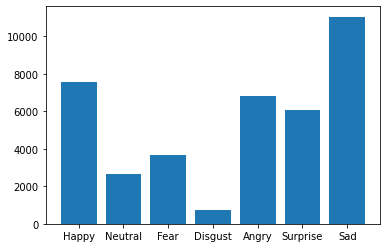

In [67]:
plt.bar(x=cnt_labels.keys(), height=cnt_labels.values())

1011    Happy
1012    Happy
1013    Happy
1014    Happy
1015    Happy
1016    Happy
1017    Happy
1018    Happy
1019    Happy
1020    Happy
Name: labels, dtype: object


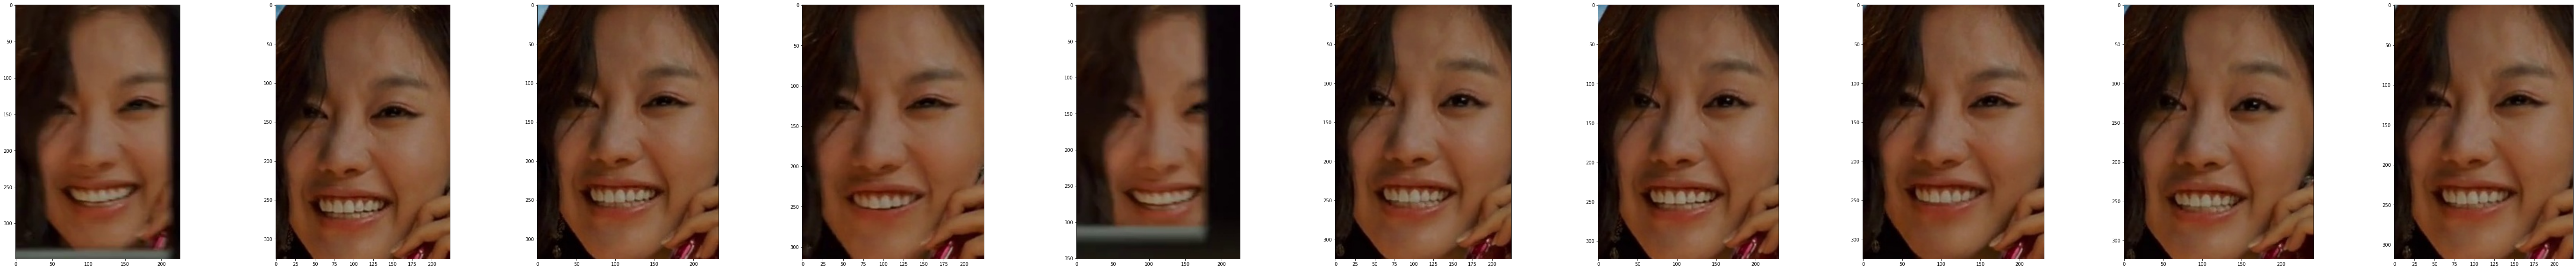

In [68]:
i = np.random.randint(0, len(train_df) - 10)
print(train_df.labels[i:i + 10])
mipkit.show_image_with_paths(img_dir='/home/congvm/Dataset/', list_paths=train_df.image_paths[i:i + 10])

In [69]:
val_df = pd.DataFrame(data=list(zip(val_paths, val_labels)), columns=['image_paths', 'labels'])
val_df.head(10)
val_df.describe()

image_paths labels
count                                               16458  16458
unique                                              16458      7
top     KERC2019/faces/val/Angry/Angry_208.mp4/frame_1...  Angry
freq                                                    1   4894

In [70]:
cnt_labels = Counter(val_df.labels)

<BarContainer object of 7 artists>

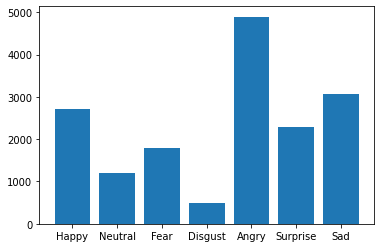

In [71]:
plt.bar(x=cnt_labels.keys(), height=cnt_labels.values())

In [72]:
val_df.to_csv('/home/congvm/Dataset/dataset/val_kerc2019.csv', index=False)

12406    Surprise
12407    Surprise
12408    Surprise
12409    Surprise
12410    Surprise
12411    Surprise
12412    Surprise
12413    Surprise
12414    Surprise
12415    Surprise
Name: labels, dtype: object


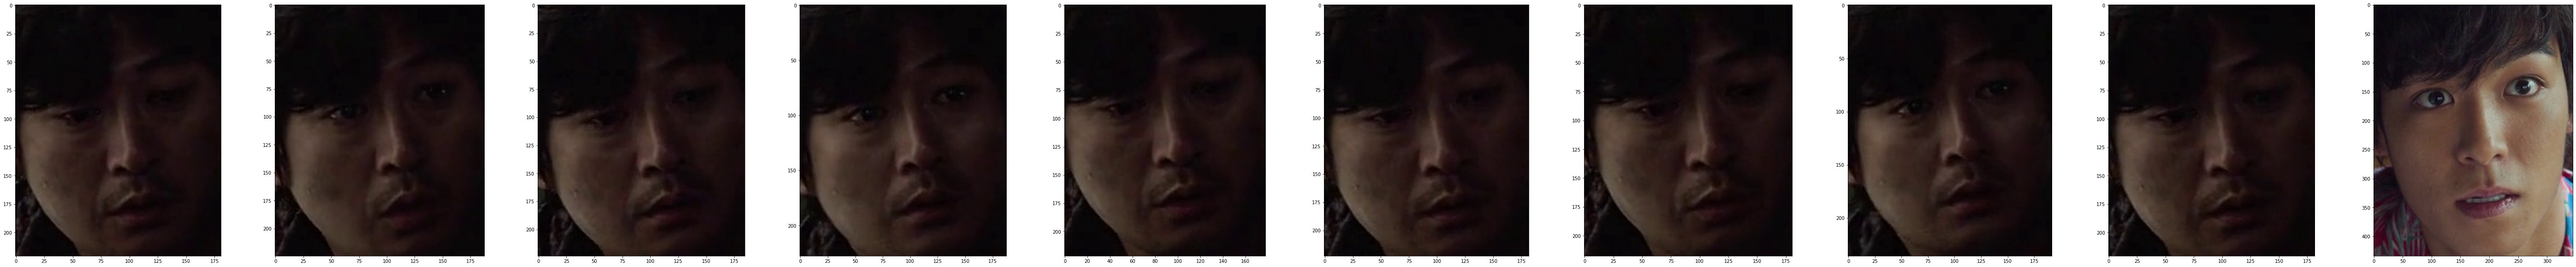

In [74]:
i = np.random.randint(0, len(val_df) - 10)
print(val_df.labels[i:i + 10])
mipkit.show_image_with_paths(img_dir='/home/congvm/Dataset/', list_paths=val_df.image_paths[i:i + 10])

## Numerical Category Label

In [69]:
converted_dict = {}
for idx, lbl in enumerate(np.unique(train_df.labels)):
    converted_dict[lbl] = idx

In [70]:
converted_dict

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}